## Data Question 3: Web Scraping Earthquake Data
### Part 1
To start, read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using the `requests` and/or `beautifulsoup` library and load it to a pandas dataframe. You will need to do some data cleaning before you can proceed.

Data cleaning tasks include:

* Replace empty strings with NaN
* Remove the footnotes from the 'Other Source Deaths' column
* Convert Magnitude to a numeric type. For this portion, you can ignore differences in seismic magnitude scales.
* Correct number of deaths when there is more than one value. When there is more than one value given, choose the largest.
* Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
* Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

Also, add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects, but understand that it is not required.

In [1]:
# import statements
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import io
# import scipy.stats as stats
# import statsmodels.api as sm

In [2]:
# display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
earthquakes = pd.read_csv('../data/earthquakes_wikitable.csv')

In [4]:
earthquakes.sort_values('max_deaths', ascending = False)

,origin_utc,date_ymd,time,country,lat,long,depth_km,magnitude,magnitude_num,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths,other_source_deaths_new,osd1,osd2,osd3,max_deaths
583,1976-07-27 19:42,1976-07-27,19:42,China (see 1976 Tangshan earthquake),39.605,117.888,16.7,7.6 Mw,7.6,NaN,655237.0,655237.0,242800.0,242000.0,NaN,NaN,NaN,NaN,NaN,655237.0
1237,2004-12-26 00:58,2004-12-26,00:58,Indonesia (see 2004 Indian Ocean earthquake),3.287,95.972,30.0,9.1 Mw,9.1,"T,L",NaN,297200.0,NaN,NaN,231000 283000 227898,283000.0,231000.0,283000.0,227898.0,297200.0
102,1920-12-16 12:05,1920-12-16,12:05,China (see 1920 Haiyuan earthquake),36.601,105.317,25.0,8.6 Ms,8.6,NaN,NaN,NaN,235502.0,180000.0,NaN,NaN,NaN,NaN,NaN,235502.0
1327,2010-01-12 17:00,2010-01-12,17:00,Haiti (see 2010 Haiti earthquake),18.457,-72.533,13.0,7.0 Mw,7.0,NaN,NaN,NaN,NaN,NaN,222517,222517.0,222517.0,NaN,NaN,222517.0
140,1927-05-22 22:32,1927-05-22,22:32,China (see 1927 Gulang earthquake),37.386,102.311,25.0,7.9 Ms,7.9,NaN,NaN,NaN,80000.0,200000.0,NaN,NaN,NaN,NaN,NaN,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,2008-10-06 16:30,2008-10-06,16:30,China (see 2008 Damxung earthquake),NaN,NaN,NaN,6.4 Mw,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322,2009-07-09 11:19,2009-07-09,11:19,China (see 2009 Yunnan earthquake),NaN,NaN,NaN,5.7 Mw,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1333,2011-03-10 04:58,2011-03-10,04:58,China (see 2011 Yunnan earthquake),NaN,NaN,NaN,5.4 Mw,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,2011-04-07 14:32,2011-04-07,14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origin_utc               1340 non-null   object 
 1   date_ymd                 1340 non-null   object 
 2   time                     1332 non-null   object 
 3   country                  1340 non-null   object 
 4   lat                      1325 non-null   object 
 5   long                     1325 non-null   object 
 6   depth_km                 1249 non-null   float64
 7   magnitude                1339 non-null   object 
 8   magnitude_num            1338 non-null   float64
 9   secondary_effects        373 non-null    object 
 10  pde_shaking_deaths       738 non-null    float64
 11  pde_total_deaths         749 non-null    float64
 12  utsu_total_deaths        1027 non-null   float64
 13  em_dat_total_deaths      559 non-null    float64
 14  other_source_deaths     

In [6]:
earthquakes.corr()

,depth_km,magnitude_num,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths_new,osd1,osd2,osd3,max_deaths
depth_km,1.000000,0.164748,-0.015792,-0.011442,-0.022681,-0.024908,0.189265,0.172676,1.0,NaN,-0.022377
magnitude_num,0.164748,1.000000,0.085692,0.128050,0.154792,0.222803,0.448148,0.427166,1.0,NaN,0.139651
pde_shaking_deaths,-0.015792,0.085692,1.000000,0.994107,0.954850,0.924447,0.764003,0.764003,NaN,NaN,0.993060
pde_total_deaths,-0.011442,0.128050,0.994107,1.000000,0.977493,0.949703,0.999928,0.999959,1.0,NaN,0.999791
utsu_total_deaths,-0.022681,0.154792,0.954850,0.977493,1.000000,0.924472,0.950601,0.950601,NaN,NaN,0.893445
em_dat_total_deaths,-0.024908,0.222803,0.924447,0.949703,0.924472,1.000000,0.943598,0.943598,NaN,NaN,0.901092
other_source_deaths_new,0.189265,0.448148,0.764003,0.999928,0.950601,0.943598,1.000000,0.994342,1.0,NaN,0.995670
osd1,0.172676,0.427166,0.764003,0.999959,0.950601,0.943598,0.994342,1.000000,1.0,NaN,0.990688
osd2,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.0,NaN,1.000000
osd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The correlations are generally weak across the quantitative variables (with the exception of the various types of deaths). This is surprising - I would have anticipated some sort of correlation between magnitude/depth and maximum number of deaths.

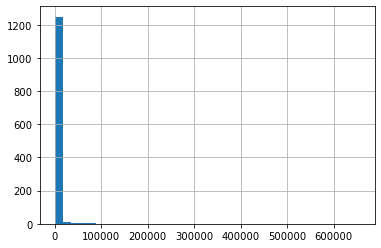

In [10]:
earthquakes['max_deaths'].hist(bins = 37);

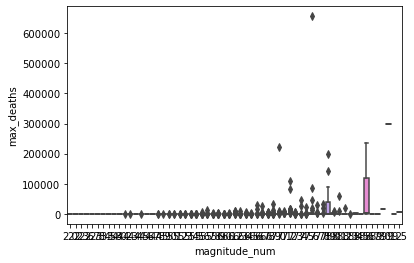

In [12]:
sns.boxplot(x='magnitude_num', y='max_deaths', data=earthquakes)